In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
A = imread('../data/peppers-large.tiff')

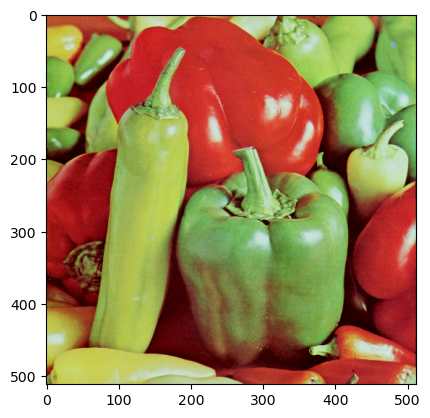

In [3]:
# To display the image
plt.imshow(A)
plt.show()

In [4]:
red_A = A[:,:,0]
green_A = A[:,:,1]
blue_A = A[:,:,2]

In [5]:
A = imread('../data/peppers-small.tiff')
print("A.shape : ", A.shape)
M, N, _ = A.shape
red_A = A[:,:,0]
green_A = A[:,:,1]
blue_A = A[:,:,2]
print("A[30,40,:] = ", A[30,40,:])
print("A[30,40,:].shape", A[30,40,:].shape)

A.shape :  (128, 128, 3)
A[30,40,:] =  [178 213 162]
A[30,40,:].shape (3,)


In [6]:
# import packages
import numpy as np
import sys

In [7]:
# Setup ( example)
# number of cluster centroids = 16
K = 16
# Mu : current guss for the positions of the centers of the clusters
#    - initialized with random values
#    - each mu's belongs to 3-dim vector
mu = np.random.uniform(0, 256, size = (K,3))
print("mu =",mu)
print("mu[0,:] =", mu[0,:])
c = np.random.randint(0,K,size=(M,N))
print("C =",c)
print("C[30,45] =",c[30,40])
print("A[30,40,:] - mu[0,:] = ", A[30,40,:] - mu[0,:])
print("mu[c[30,40]] = ",mu[c[30,40],:])

mu = [[192.71305858 236.81485696 241.50859096]
 [168.58569368 159.46854925  70.2295858 ]
 [ 73.41601836 211.72819461 106.45918224]
 [138.67876649 154.0563716   57.73385385]
 [203.3783441  128.5261409  101.37394326]
 [208.84918655 127.4932282   38.02439137]
 [240.53402995 177.29578907   7.65812819]
 [ 71.95130602 218.15722186 100.30393501]
 [ 28.24142461 118.44877227  49.63718308]
 [ 64.41435822 119.86343259  78.95235112]
 [126.85839724  53.31974798  74.17845868]
 [206.61633702  33.57619988 110.41852947]
 [ 71.30943668 169.95249336 156.491352  ]
 [150.51072175  82.31371171 127.79994855]
 [ 68.97134085 171.90058956 117.6260662 ]
 [207.38121153  58.15597773  89.74541502]]
mu[0,:] = [192.71305858 236.81485696 241.50859096]
C = [[ 7  1  7 ... 13 12  9]
 [ 4 12  9 ...  8 14 13]
 [ 3  0 13 ... 15  9 15]
 ...
 [ 3  9 10 ...  0  6 15]
 [ 6  4 14 ...  0  6 12]
 [ 6 11 11 ...  5 10  2]]
C[30,45] = 5
A[30,40,:] - mu[0,:] =  [-14.71305858 -23.81485696 -79.50859096]
mu[c[30,40]] =  [208.84918655 127

In [8]:
        
class Kmeans(object):
    """Base class for k means model."""


    def __init__(self,  num_cluster = 16, max_iter = 100, eps = 0.99,A = None):
        self.num_cluster = num_cluster
        self.max_iter = max_iter
        self.eps = eps
        self.A = A
        
                
        if A is not None:
            if not isinstance(A, np.ndarray):
                raise ValueError("A must be a numpy array")    
            
            # if A.ndim != 3:
                # raise ValueError("A must be a 3-dimensional array")
            self.M, self.N, self.num_channels = A.shape
            self.c = np.random.randint(0,num_cluster,size=(self.M,self.N))

            self.mu = self.initialize_centroids(A,num_cluster)
            while self.check_cluster_assignmets() is False:
                self.mu = self.initialize_centroids(A,num_cluster)

    def initialize_centroids(self, A, num_cluster):
        #   self.mu = np.random.randint(0, 256, size = (num_cluster,self.num_channels))
        # Reshape A to a 2D arrya where each row is a pixel
        reshaped_A = A.reshape(-1,3)
        
        # Randomly pick num_cluster rows from reshaped_A
        indices = np.random.choice(reshaped_A.shape[0], num_cluster, replace=False)
        return reshaped_A[indices]
        
    def check_cluster_assignmets(self):
        print("Checking cluster centroids")
        print("with c = ", self.c)
        self.set_c()
        for k in range(self.num_cluster):
            denominator = 0
            for i in range(self.M):
                for j in range(self.N):
                    if self.c[i,j] == k :
                        denominator += 1
            if denominator <= 0:
                return False
        return True   

    def set_c(self):
        for i in range(self.M):
            for j in range(self.N):
                index_min = 0
                min_norm = sys.float_info.max
                for k in range(self.num_cluster):
                    if np.linalg.norm((self.A[i,j,:]-self.mu[k,:]),ord=2) < min_norm:
                        min_norm = np.linalg.norm((self.A[i,j,:]-self.mu[k,:]),ord=2)
                        index_min = k
                self.c[i,j] = index_min
        return self.c

    def set_mu(self):
        for k in range(self.num_cluster):
            numerator = np.zeros(3)
            denominator = 0
            for i in range(self.M):
                for j in range(self.N):
                    if self.c[i,j] == k :
                        numerator += self.A[i,j,:]
                        denominator += 1
            self.mu[k,:] = numerator/denominator

    def compress(self):
        print('==== Compression started ====')
        iter = 0
        
        while True:
            iter += 1
            previous_c = self.set_c()
            self.set_mu()
            #break condition
            print("c = ", self.c)
            if iter % 10 == 0 :
                print('Finished %d iterations' % iter)
            # if np.mean(previous_c == self.c) > self.eps:
                # break
            if iter > 50:
                break
        print('==== Algorithm ended ====')
        # change the color of each pixels
        result = np.zeros((self.M,self.N,self.num_channels))
        for i in range(self.M):
            for j in range(self.N):
                result[i,j,:] = self.mu[self.c[i,j],:]
        print('==== Compression ended ====')
        return result

Checking cluster centroids
with c =  [[ 8 13  9 ... 14  0  6]
 [14 10  9 ...  5  6 13]
 [ 4  2  8 ... 15  4  7]
 ...
 [10  1  6 ...  3  0  0]
 [ 1  8  1 ...  7 15  4]
 [ 5  9  9 ...  8  7  2]]
==== Compression started ====
c =  [[ 2  2  2 ...  9  9 12]
 [ 2  7  7 ...  3  3 12]
 [ 2  2  2 ...  8 12 12]
 ...
 [ 2 12  9 ...  9 11 13]
 [ 2  4  9 ... 13 13  5]
 [ 2  4  9 ...  5  5 13]]
c =  [[ 1  2  2 ... 12 10 10]
 [ 1  2  2 ... 12 12 12]
 [ 1  2  1 ... 12 12 12]
 ...
 [14  4 10 ... 12  0  0]
 [14 14 10 ...  0  0 13]
 [14 14 10 ... 13 13  0]]
c =  [[ 5  5  5 ... 15 15 15]
 [ 5  1  5 ... 12 12  7]
 [ 5  5  5 ... 12  7  7]
 ...
 [ 5  7  7 ... 15  0  0]
 [ 5  5  7 ...  0  0  0]
 [ 5  5  7 ...  0  0  0]]
c =  [[ 6  6  6 ... 15 15 14]
 [ 6  6  6 ...  7  7  7]
 [ 6  6  6 ...  7  7  7]
 ...
 [ 6 14 14 ... 15  8  8]
 [ 6  6 14 ...  8  8  8]
 [ 6  6 14 ...  8  8  8]]
c =  [[11 11 11 ...  5  6  6]
 [11 11 11 ...  6  6 11]
 [11 11 11 ...  6  6 11]
 ...
 [11  6  6 ...  7  4  8]
 [11 11  5 ... 12 12  8

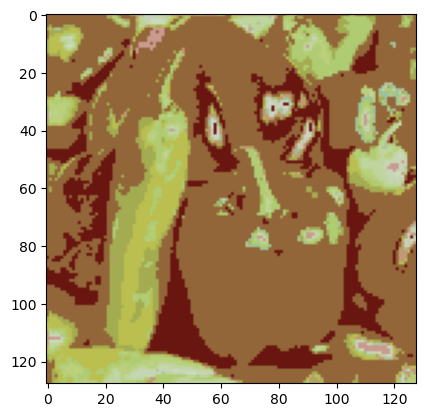

In [9]:
compressor = Kmeans(A=A)
compressed_A = compressor.compress()
compressed_A_uint8 = compressed_A.astype(np.uint8)

# Now you can display the image
plt.imshow(compressed_A_uint8)
plt.show()